In [200]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math as m
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(521)

In [201]:
df = pd.read_csv('Project_1_Clean.csv', index_col = 0)
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Dev_same_publisher,Years_Since_Release
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,1,11.0
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1,9.0
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,1,8.0
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,1,11.0
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,1,11.0


In [202]:
del df['Year_of_Release']

In [203]:
df2 = df.copy()

In [204]:
y = df2.pop('Global_Sales')

In [205]:
df3 = df2.copy()

***Feature selection was done in part 1. We found that Platform, Genre, Critic_Score, Critic_Count, User_Score, User_Count, Developer and Rating were significant at the univariate level. So we will create the dataframe with these features.***

***The following code is taken from part 1***

In [206]:
df3['Publisher'] = 'P_' + df3['Publisher']
df3['Developer'] = 'D_' + df3['Developer']
df_Platform = pd.get_dummies(df3['Platform'])
del df_Platform['PS2'] #reference group
df_Genre = pd.get_dummies(df3['Genre'])
del df_Genre['Action'] #reference group
df_Publisher = pd.get_dummies(df3['Publisher'])
del df_Publisher['P_Other'] #reference group
df_Rating = pd.get_dummies(df3['Rating'])
del df_Rating['T'] #reference group
df_Developer = pd.get_dummies(df3['Developer'])
del df_Developer['D_Other'] #reference group
df4 = df3.copy()
df4 = pd.concat([df4, df_Platform, df_Genre, df_Publisher, df_Rating, df_Developer], axis=1)
del df4['Name']
del df4['Dev_same_publisher']
del df4['Years_Since_Release']
del df4['Platform']
del df4['Genre']
del df4['Publisher']
del df4['Rating']
del df4['Developer']
del df4['NA_Sales']
del df4['JP_Sales']
del df4['EU_Sales']
del df4['Other_Sales']

In [207]:
X = df4.copy()

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Linear Regression

In [209]:
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [210]:
linear_reg1 = LinearRegression()

In [211]:
linear_reg_cv1 = GridSearchCV(linear_reg1, param_grid, cv=5)

In [212]:
linear_reg_cv1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [239]:
predictions = linear_reg_cv1.predict(X_test)

In [240]:
mean_squared_error(y_test, predictions)

2.0051443897534571

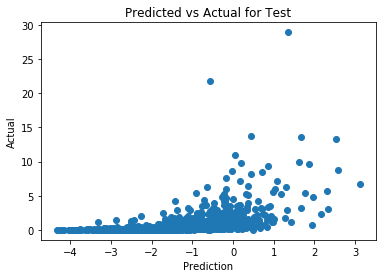

In [238]:
plt.scatter(predictions, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Predicted vs Actual for Test')
plt.show()

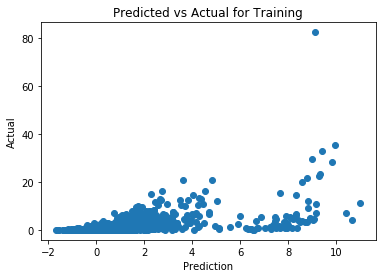

In [216]:
plt.scatter(linear_reg_cv1.predict(X_train), y_train)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Predicted vs Actual for Training')
plt.show()

In [217]:
linear_reg_cv1.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [218]:
linear_reg_cv1.best_score_

0.28191117600827664

***Try with ln transformation on global_sales as in part 1***

In [219]:
y_train_log = y_train.apply(m.log)

In [220]:
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [221]:
linear_reg2 = LinearRegression()

In [222]:
linear_reg_cv2 = GridSearchCV(linear_reg2, param_grid, cv=5)

In [223]:
linear_reg_cv2.fit(X_train, y_train_log)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [229]:
predictions = linear_reg_cv2.predict(X_test)

In [225]:
mean_squared_error(y_test, np.exp(predictions))

2.2080726682829543

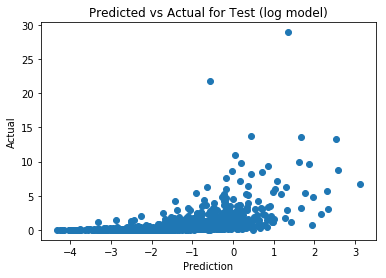

In [226]:
plt.scatter(predictions, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Predicted vs Actual for Test (log model)')
plt.show()

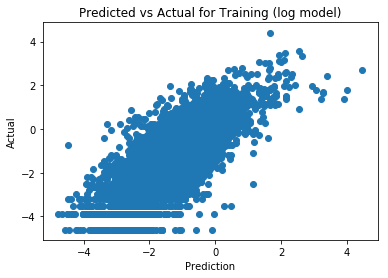

In [227]:
plt.scatter(linear_reg_cv2.predict(X_train), y_train_log)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Predicted vs Actual for Training (log model)')
plt.show()

***Above we found that the non-log model performed better for the predictions. This is likely attributed to the plot above. We see that the log transformed model in the training set has a very linear-like relationship. While this is good for a statistical model, it's not ideal for a machine learning model. This is because our training data can't generalize to the test data from overfitting. The general shape of the predicted vs actual is completely different from the training versus the test data. In the non-log case, we observe that both plots have the same shape, so when it came time to predict on the test set, it could generalize much better and have more accurate predictions.***

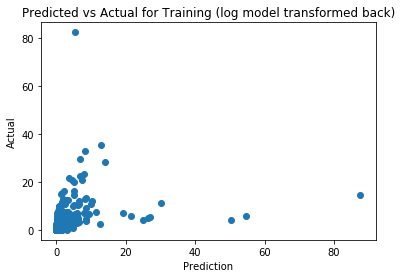

In [245]:
plt.scatter(np.exp(linear_reg_cv2.predict(X_train)), np.exp(y_train_log))
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Predicted vs Actual for Training (log model transformed back)')
plt.show()

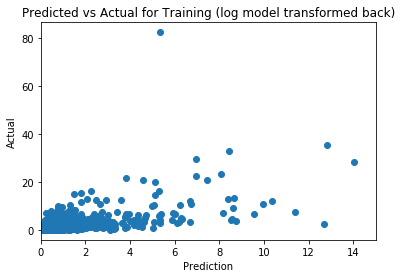

In [247]:
plt.scatter(np.exp(linear_reg_cv2.predict(X_train)), np.exp(y_train_log))
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Predicted vs Actual for Training (log model transformed back)')
plt.xlim((0, 15))
plt.show()

***Above we see what the shape looks like if we convert the transformed model back into a non-log model. The shape doesn't really match to that of the test data which is why we see that the accuracy of the predictions is lower.***

***Another big contributor may be the outlier at the top (Wii sports at 80 million). This outlier is positioned more toward the left compared to the non-log transformation model. This would cause the lower end of predictions to be higher than normal. Since we can't have below 0 predictions either due to the exponential function applied to the natural log, we would have higher predicted values in this lower end of the spectrum compared to the non-log transformation. In particular, the cluster of points in the non-log model is located at 0 and below. In the log model, it is located between 0 and 3. In general, there appears to be more outliers in the log transformed model when compared to the non-log transformed model.***

## Ridge

In [48]:
param_grid = {'alpha':np.logspace(-5, 0, 20), 'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X': [True,False],
              'solver':['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [52]:
ridge1 = Ridge()

In [53]:
ridge_cv1 = RandomizedSearchCV(ridge1, param_grid, cv=5, n_iter = 200)

In [54]:
ridge_cv1.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid=True, n_iter=200, n_jobs=1,
          param_distributions={'alpha': array([  1.00000e-05,   1.83298e-05,   3.35982e-05,   6.15848e-05,
         1.12884e-04,   2.06914e-04,   3.79269e-04,   6.95193e-04,
         1.27427e-03,   2.33572e-03,   4.28133e-03,   7.84760e-03,
         1.43845e-02,   2.63665e-02,   4.83293e-02,   8.85867e-02,
  ... False], 'copy_X': [True, False], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [55]:
predictions = ridge_cv1.predict(X_test)

In [56]:
mean_squared_error(y_test, predictions)

2.0098689042381364

***With log transform***

In [57]:
ridge2 = Ridge()

In [58]:
ridge_cv2 = RandomizedSearchCV(ridge2, param_grid, cv=5, n_iter = 200)

In [59]:
ridge_cv2.fit(X_train, y_train_log)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid=True, n_iter=200, n_jobs=1,
          param_distributions={'alpha': array([  1.00000e-05,   1.83298e-05,   3.35982e-05,   6.15848e-05,
         1.12884e-04,   2.06914e-04,   3.79269e-04,   6.95193e-04,
         1.27427e-03,   2.33572e-03,   4.28133e-03,   7.84760e-03,
         1.43845e-02,   2.63665e-02,   4.83293e-02,   8.85867e-02,
  ... False], 'copy_X': [True, False], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [60]:
predictions = ridge_cv2.predict(X_test)

In [61]:
mean_squared_error(y_test, np.exp(predictions))

2.2149805825353424

## Support Vector Regressor

In [62]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0], 'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}

In [63]:
svr1 = SVR(cache_size = 10000)

In [64]:
svr_cv1 = GridSearchCV(svr1, param_grid, cv=5)

In [65]:
svr_cv1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=10000, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [66]:
predictions = svr_cv1.predict(X_test)

In [67]:
mean_squared_error(y_test, predictions)

2.4542831820538034

***With log transform***

In [68]:
svr2 = SVR(cache_size = 2000)

In [69]:
svr_cv2 = GridSearchCV(svr2, param_grid, cv=5)

In [70]:
svr_cv2.fit(X_train, y_train_log)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=2000, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [71]:
predictions = svr_cv2.predict(X_test)

In [72]:
mean_squared_error(y_test, np.exp(predictions))

2.5249133868714431

## Random Forest Regressor

In [73]:
param_grid = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4, 8, 16, 32],
              'min_samples_split': [2, 5, 10, 20, 40]}

In [74]:
forest1 = RandomForestRegressor(n_estimators=150)

In [75]:
forest_cv1 = RandomizedSearchCV(forest1, param_grid, cv=5, n_iter = 1000)

In [76]:
forest_cv1.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=1000, n_jobs=1,
          param_distributions={'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4, 8, 16, 32], 'min_samples_split': [2, 5, 10, 20, 40]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [77]:
predictions = forest_cv1.predict(X_test)

In [78]:
mean_squared_error(y_test, predictions)

1.4791877056096561

***With log transform***

In [79]:
forest2 = RandomForestRegressor(n_estimators=150)

In [80]:
forest_cv2 = RandomizedSearchCV(forest2, param_grid, cv=5, n_iter = 1000)

In [81]:
forest_cv2.fit(X_train, y_train_log)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=1000, n_jobs=1,
          param_distributions={'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4, 8, 16, 32], 'min_samples_split': [2, 5, 10, 20, 40]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [82]:
predictions = forest_cv2.predict(X_test)

In [83]:
mean_squared_error(y_test, np.exp(predictions))

1.8247836366355128

## XGBoost

In [90]:
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 10],
              'min_child_weight': [0.0000000001, .00000001, 0.000001, 0.0001, 0.001, 0.01],
              'subsample': [0.75, 1],
              'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
              'booster': ['gbtree', 'gblinear', 'dart']}


In [91]:
xgb1 = XGBRegressor(eta = 0.01, num_round = 1000, tree_method = 'exact')

In [92]:
xgb_cv1 = GridSearchCV(xgb1, param_grid, cv=5)


In [93]:
xgb_cv1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.01, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_round=1000,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1,
       tree_method='exact'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 10], 'min_child_weight': [1e-10, 1e-08, 1e-06, 0.0001, 0.001, 0.01], 'subsample': [0.75, 1], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7], 'booster': ['gbtree', 'gblinear', 'dart']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [94]:
predictions = xgb_cv1.predict(X_test)

In [95]:
mean_squared_error(y_test, predictions)

1.5172192393150847

In [96]:
xgb_cv1.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.6,
 'max_depth': 4,
 'min_child_weight': 1e-10,
 'subsample': 1}

***With log transform***

In [97]:
xgb2 = XGBRegressor(eta = 0.01, num_round = 1000, tree_method = 'exact')

In [98]:
xgb_cv2 = GridSearchCV(xgb2, param_grid, cv=5)

In [99]:
xgb_cv2.fit(X_train, y_train_log)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.01, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_round=1000,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=1,
       tree_method='exact'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 10], 'min_child_weight': [1e-10, 1e-08, 1e-06, 0.0001, 0.001, 0.01], 'subsample': [0.75, 1], 'colsample_bytree': [0.4, 0.5, 0.6, 0.7], 'booster': ['gbtree', 'gblinear', 'dart']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [100]:
predictions = xgb_cv2.predict(X_test)

In [101]:
mean_squared_error(y_test, predictions)

5.9142424095852499